####  I just learn from how to create ARIMA model from the blog to apply into my own dataset: 
https://medium.com/@derejeabera/stock-price-prediction-using-arima-model-251ddb4ee52a#:~:text=To%20predict%20an%20outcome%20based,prices%20based%20on%20historical%20prices.

#### Make the data stationary:

https://www.machinelearningplus.com/time-series/augmented-dickey-fuller-test/

#### Other blog post for ARIMA model:

https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/

In [1]:
#!pip install pmdarima

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use("seaborn")
%matplotlib inline
from matplotlib.pyplot import rcParams
from plotly.graph_objs import *
from plotly.offline import init_notebook_mode, iplot, iplot_mpl
init_notebook_mode()
from tqdm import tqdm
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import pmdarima as pm
from datetime import datetime
from time_series_helper_functions import *
from functools import reduce

## Predict tomorrow's price

In [2]:
df = get_data("AMD", 50)
sma_s = 5
sma_m = 20
sma_l = 100

df_close = preprocess_data(df, "Adj Close", SMA=True, sma_s=sma_s, sma_m=sma_m, sma_l=sma_l, 
                     MACD=False, RSI=False, SOI=False, Bband=False)
df_high = preprocess_data(df, "High", SMA=True, sma_s=sma_s, sma_m=sma_m, sma_l=sma_l, 
                     MACD=False, RSI=False, SOI=False, Bband=False)
df_low = preprocess_data(df, "Low", SMA=True, sma_s=sma_s, sma_m=sma_m, sma_l=sma_l, 
                     MACD=False, RSI=False, SOI=False, Bband=False)
df_open = preprocess_data(df, "Open", SMA=True, sma_s=sma_s, sma_m=sma_m, sma_l=sma_l, 
                     MACD=False, RSI=False, SOI=False, Bband=False)
dfs = {"Close": df_close, "High": df_high, "Low": df_low, "Open": df_open}

[*********************100%***********************]  1 of 1 completed


In [16]:
#df_close = df_close[:-1]
#df_high = df_high[:-1]
#df_low = df_low[:-1]
#df_open = df_open[:-1]
#dfs = {"Close": df_close, "High": df_high, "Low": df_low, "Open": df_open}

In [3]:
dfs["Close"].tail()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-05-31  102.430000  104.550003  100.040001  101.860001  101.860001   
2022-06-01  102.129997  103.570000   99.550003  101.220001  101.220001   
2022-06-02  100.779999  109.500000  100.779999  108.589996  108.589996   
2022-06-03  105.800003  109.389999  104.650002  106.300003  106.300003   
2022-06-06  108.269997  109.570000  104.230003  105.650002  105.650002   

               Volume  DiffClose$  DiffOpen$  DiffHigh$  DiffLow$    Closep  \
Date                                                                          
2022-05-31  125102900   -0.400002   2.290001   2.150002  0.660004 -0.003912   
2022-06-01   99351400   -0.639999  -0.300003  -0.980003 -0.489998 -0.006283   
2022-06-02  120953800    7.369995  -1.349998   5.930000  1.229996  0.072812   
2022-06-03  110801500   -2.289993   5.020004  -0.110001  3.870003 -0.021088   
2022-06-06   96651000   -0.650002   2.469994   0.180000 -0.419998 -0.006115   

               Openp     Highp      Lowp       SMA_s    SMA_m     SMA_l  \
Date                                                                      
2022-05-31  0.022868  0.020996  0.006641   95.375999  94.0085  109.0681   
2022-06-01 -0.002929 -0.009374 -0.004898   97.293999  94.6225  108.7275   
2022-06-02 -0.013218  0.057256  0.012356   99.363998  94.7525  108.3725   
2022-06-03  0.049812 -0.001005  0.038401  102.256000  95.1600  108.1397   
2022-06-06  0.023346  0.001645 -0.004013  103.881999  95.8565  107.8879   

              smap_s    smap_m    smap_l  
Date                                      
2022-05-31  0.023215  0.009856 -0.002374  
2022-06-01  0.020709  0.007264 -0.001939  
2022-06-02  0.022625  0.001967 -0.002078  
2022-06-03  0.030575  0.004728 -0.001052  
2022-06-06  0.015976  0.007590 -0.001157

In [4]:
dfs["Low"].tail()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-05-31  102.430000  104.550003  100.040001  101.860001  101.860001   
2022-06-01  102.129997  103.570000   99.550003  101.220001  101.220001   
2022-06-02  100.779999  109.500000  100.779999  108.589996  108.589996   
2022-06-03  105.800003  109.389999  104.650002  106.300003  106.300003   
2022-06-06  108.269997  109.570000  104.230003  105.650002  105.650002   

               Volume  DiffClose$  DiffOpen$  DiffHigh$  DiffLow$    Closep  \
Date                                                                          
2022-05-31  125102900   -0.400002   2.290001   2.150002  0.660004 -0.003912   
2022-06-01   99351400   -0.639999  -0.300003  -0.980003 -0.489998 -0.006283   
2022-06-02  120953800    7.369995  -1.349998   5.930000  1.229996  0.072812   
2022-06-03  110801500   -2.289993   5.020004  -0.110001  3.870003 -0.021088   
2022-06-06   96651000   -0.650002   2.469994   0.180000 -0.419998 -0.006115   

               Openp     Highp      Lowp       SMA_s    SMA_m     SMA_l  \
Date                                                                      
2022-05-31  0.022868  0.020996  0.006641   95.375999  94.0085  109.0681   
2022-06-01 -0.002929 -0.009374 -0.004898   97.293999  94.6225  108.7275   
2022-06-02 -0.013218  0.057256  0.012356   99.363998  94.7525  108.3725   
2022-06-03  0.049812 -0.001005  0.038401  102.256000  95.1600  108.1397   
2022-06-06  0.023346  0.001645 -0.004013  103.881999  95.8565  107.8879   

              smap_s    smap_m    smap_l  
Date                                      
2022-05-31  0.023215  0.009856 -0.002374  
2022-06-01  0.020709  0.007264 -0.001939  
2022-06-02  0.022625  0.001967 -0.002078  
2022-06-03  0.030575  0.004728 -0.001052  
2022-06-06  0.015976  0.007590 -0.001157

In [5]:
# Do the same thing as down below with using function. 
# Be able to keep the result for later use when I need to use
pred_val = "smap_m"
extra_val = "smap_l"
forecast_len = 10

results = {}

for key, original_df in dfs.items():
    f_forecast, tomorrow_forecast, change, df = future_forecast(original_df=original_df, key=key,
                                                                   forecast_len=forecast_len, pred_sma=sma_m)
    
    forecast_df = ["Close", "High", "Low", "Open"]
    for data in forecast_df:
    
        if key == data:
            results[key] = {}
            results[key]["result"] = df
            results[key]['forecast'] = f_forecast
            results[key]['tomorrow'] = tomorrow_forecast
            results[key]["change"] = change

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-94307.004, Time=17.13 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-70913.686, Time=4.85 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-94075.178, Time=6.54 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-79139.987, Time=16.06 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-94073.270, Time=7.05 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-95087.536, Time=16.99 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-94073.513, Time=2.94 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-94073.522, Time=2.80 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=-94071.367, Time=4.38 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=-94073.427, Time=5.00 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=-94762.892, Time=20.26 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-95031.550, Time=28.67 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0]          
Total fit time: 132.823 seconds
Next 10 days forecast for Close price:
Date
2022-06-07   

In [6]:
results["Close"]['tomorrow']

97.82

In [7]:
results["High"]["tomorrow"]

106.84

In [8]:
results["Low"]["tomorrow"]

97.09

In [9]:
results["Close"]["forecast"]

Date
2022-06-07     97.816457
2022-06-08     99.806505
2022-06-09     98.246437
2022-06-10     96.658826
2022-06-11    105.034022
2022-06-12    103.458361
2022-06-13    111.934879
2022-06-14    104.591672
2022-06-15    104.502395
2022-06-16    100.584536
Name: Adj Close, dtype: float64

## This is the beginning of ARIMA model. 

I started from here using ARIMA model. First, I checked statistics to predict the price in many ways. Then I experimented many variations. 

In [2]:
symbol = "AMD"
date = "2022-04-17"

In [3]:
df = pd.read_csv(f"{symbol}-{date}", index_col="Date")
df.head()

Open      High       Low     Close  Adj Close  Volume
Date                                                             
1980-03-17   0.0  3.302083  3.125000  3.145833   3.145833  219600
1980-03-18   0.0  3.125000  2.937500  3.031250   3.031250  727200
1980-03-19   0.0  3.083333  3.020833  3.041667   3.041667  295200
1980-03-20   0.0  3.062500  3.010417  3.010417   3.010417  159600
1980-03-21   0.0  3.020833  2.906250  2.916667   2.916667  130800

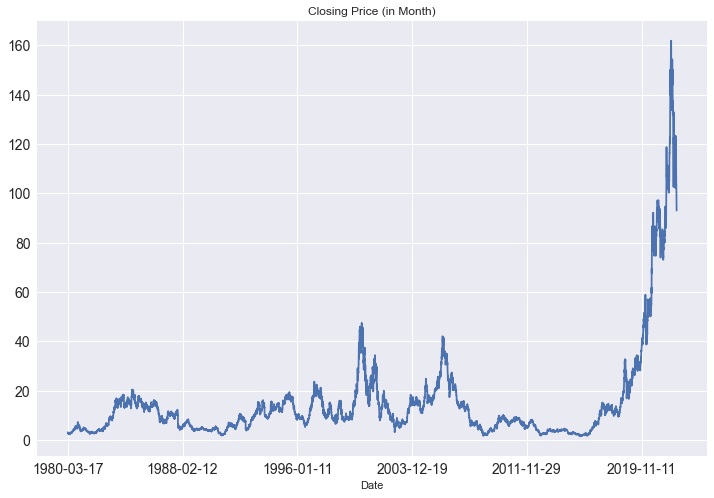

In [4]:
df1 = df.groupby(["Date"])['Close'].mean()
df1.plot(figsize=(12, 8), title="Closing Price (in Month)", fontsize=14);

In [6]:
df = preprocess_data(df, "High", SMA=True, sma_s=5, sma_m=10, sma_l=20, 
                     MACD=False, RSI=False, SOI=False, Bband=False).iloc[1: , :]
df.head()

Open      High       Low     Close  Adj Close  Volume  \
Date                                                                    
1980-04-16  2.562500  2.572917  2.343750  2.354167   2.354167  358800   
1980-04-17  2.354167  2.427083  2.270833  2.427083   2.427083  696000   
1980-04-18  2.427083  2.468750  2.312500  2.322917   2.322917  342000   
1980-04-21  2.322917  2.364583  2.281250  2.291667   2.291667  498000   
1980-04-22  2.291667  2.604167  2.375000  2.562500   2.562500  880800   

            DiffClose$  DiffOpen$  DiffHigh$  DiffLow$    Closep     Openp  \
Date                                                                         
1980-04-16   -0.208333   0.000000   0.010417 -0.177083 -0.081301  0.000000   
1980-04-17    0.072916  -0.208333  -0.145834 -0.072917  0.030973 -0.081301   
1980-04-18   -0.104166   0.072916   0.041667  0.041667 -0.042918  0.030973   
1980-04-21   -0.031250  -0.104166  -0.104167 -0.031250 -0.013453 -0.042918   
1980-04-22    0.270833  -0.031250   0.239584  0.093750  0.118182 -0.013453   

               Highp      Lowp     SMA_s     SMA_m     SMA_l    smap_s  \
Date                                                                     
1980-04-16  0.004065 -0.070248  2.658333  2.657292  2.716146 -0.006759   
1980-04-17 -0.056680 -0.031111  2.595833  2.626042  2.683333 -0.023563   
1980-04-18  0.017168  0.018349  2.535417  2.609375  2.653646 -0.022411   
1980-04-21 -0.042194 -0.013514  2.479167  2.584375  2.620833 -0.021828   
1980-04-22  0.101322  0.041096  2.487500  2.582292  2.605208  0.004736   

              smap_m    smap_l  
Date                            
1980-04-16 -0.007114 -0.008860  
1980-04-17 -0.011654 -0.011027  
1980-04-18 -0.006135 -0.009831  
1980-04-21 -0.009564 -0.011260  
1980-04-22  0.000169 -0.004470

In [7]:
df_to_use = df["smap_l"]
df_to_use.head()

Date
1980-04-16   -0.008860
1980-04-17   -0.011027
1980-04-18   -0.009831
1980-04-21   -0.011260
1980-04-22   -0.004470
Name: smap_l, dtype: float64

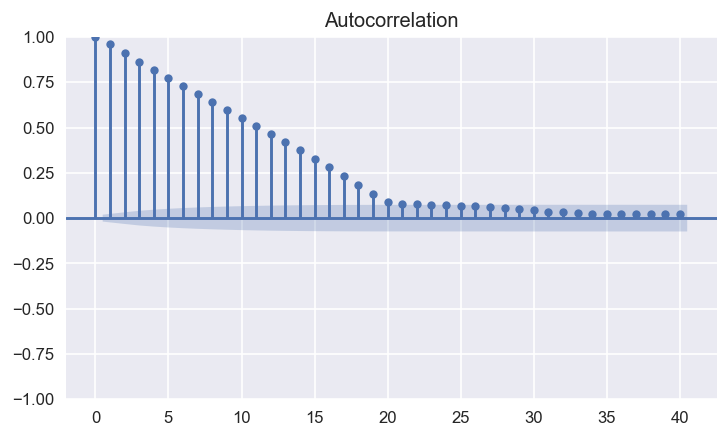

In [8]:
from matplotlib import rcParams
from statsmodels.graphics.tsaplots import plot_acf
plt.rcParams.update({"figure.figsize": (7, 4), "figure.dpi": 120})
acf = plot_acf(df_to_use, lags=40, alpha=0.05)
plt.show();

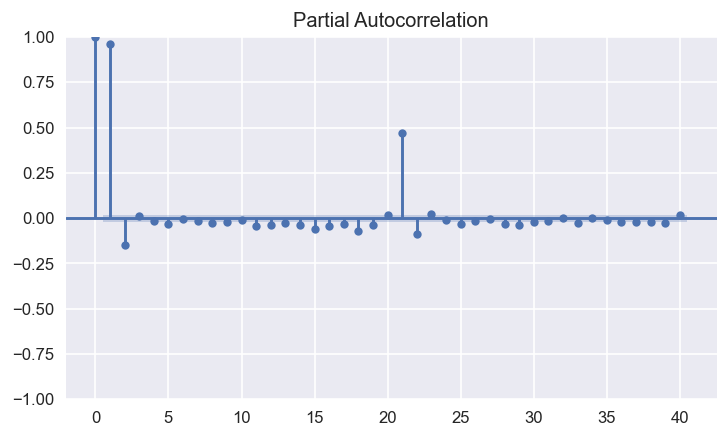

In [9]:
plt.rcParams.update({"figure.figsize": (7, 4), "figure.dpi": 120})
pacf = sm.graphics.tsa.plot_pacf(df_to_use, lags=40);

In [10]:
# ADF test (call function)
adf_test(df_to_use)

Test Statistic: -14.66912152851586
p-value: 3.288125018075264e-27
#Lags Used: 39
Number of Observations: 10551
Critical Value (1%): -3.430969930968892
Critical Value (5%): -2.861813974187153
Critical Value (10%): -2.566915831317476
icbest: -100792.8159469746

Result: The series is stationary


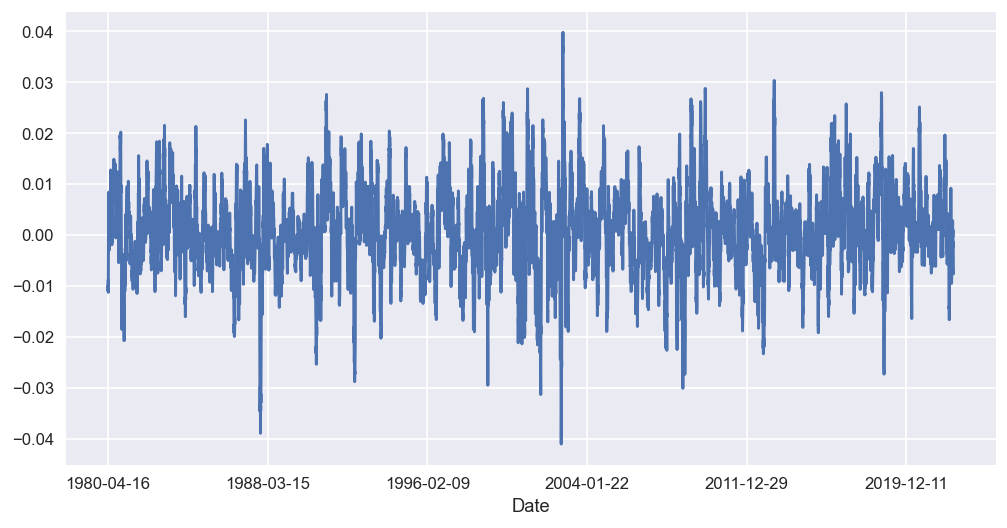

In [11]:
plt.figure(figsize=(10, 5))
df_to_use.plot();

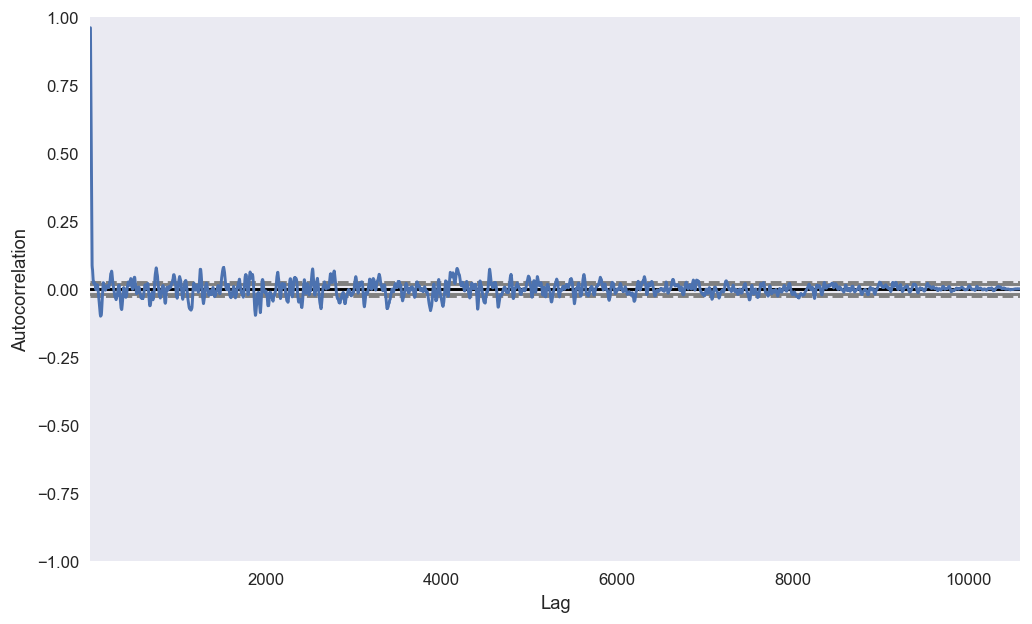

In [12]:
from pandas.plotting import autocorrelation_plot
plt.rcParams.update({"figure.figsize": (10, 6), "figure.dpi": 120})
autocorrelation_plot(df_to_use);

In [13]:
import statsmodels.stats.diagnostic as diag
 
diag.acorr_ljungbox(df_to_use, lags=[40], boxpierce=True, model_df=0, period=None, return_df=None)

(array([73877.8149713]), array([0.]), array([73821.51107472]), array([0.]))

In [14]:
# KPSS test (call function)
kpss_test(df_to_use, regression='ct')

KPSS Statistic: 0.07638105233664928
p-value: 0.1
num lags: 57
Critical Values:
   10%: 0.119
   5%: 0.146
   2.5%: 0.176
   1%: 0.216
Result: The series is stationary


## Naive model:

In [15]:
test_size = 100
train = df_to_use[:-test_size]
test = df_to_use[-test_size:]
train.shape, test.shape

((10491,), (100,))

In [19]:
naive_forecast = test[:-1]
naive_forecast[:10], test[1:11]

(Date
 2021-11-22    0.014098
 2021-11-23    0.009736
 2021-11-24    0.011116
 2021-11-26    0.012958
 2021-11-29    0.014729
 2021-11-30    0.014064
 2021-12-01    0.011866
 2021-12-02    0.008438
 2021-12-03    0.005173
 2021-12-06    0.000742
 Name: smap_l, dtype: float64,
 Date
 2021-11-23    0.009736
 2021-11-24    0.011116
 2021-11-26    0.012958
 2021-11-29    0.014729
 2021-11-30    0.014064
 2021-12-01    0.011866
 2021-12-02    0.008438
 2021-12-03    0.005173
 2021-12-06    0.000742
 2021-12-07   -0.002067
 Name: smap_l, dtype: float64)

In [17]:
naive_result = evaluate_preds(y_true=test[1:], y_pred=naive_forecast)
naive_result

{'mae': 0.0019140823,
 'mse': 5.7573393e-06,
 'rmse': 0.0023994455,
 'mape': 129.39981,
 'mase': 1.013225}

## Get ready for ARIMA model:

In [15]:
test_size = 30
train = df_to_use[:-test_size]
test = df_to_use[-test_size:]
train.shape, test.shape

((10561,), (30,))

In [16]:
model = pm.auto_arima(train, trace=True, test='adf', start_p=1, start_q=1, 
                      max_p=22, max_q=22, seasonal=False, error_action='ignore', suppress_warnings=True, )
model.fit(train)
forecast = model.predict(n_periods=len(test))
forecast = pd.DataFrame(forecast, index = test.index, columns=['Prediction'])
forecast.head(15)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-97928.394, Time=1.17 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-70458.324, Time=0.72 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-97701.240, Time=1.13 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-81705.692, Time=1.90 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-97927.997, Time=1.48 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-97927.893, Time=2.07 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-88041.048, Time=3.65 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-97929.032, Time=1.58 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=-97927.879, Time=1.55 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=-97925.753, Time=1.30 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-97930.209, Time=5.16 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-97701.562, Time=1.32 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-97928.998, Time=2.28 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-97929.117, Time=5.83 sec
 ARIM

Prediction
Date                  
2022-03-04   -0.005011
2022-03-07   -0.004838
2022-03-08   -0.004553
2022-03-09   -0.004264
2022-03-10   -0.003988
2022-03-11   -0.003726
2022-03-14   -0.003478
2022-03-15   -0.003243
2022-03-16   -0.003021
2022-03-17   -0.002810
2022-03-18   -0.002611
2022-03-21   -0.002422
2022-03-22   -0.002244
2022-03-23   -0.002074
2022-03-24   -0.001914

In [17]:
test[:15]

Date
2022-03-04   -0.004793
2022-03-07   -0.006165
2022-03-08   -0.007064
2022-03-09   -0.006664
2022-03-10   -0.009497
2022-03-11   -0.009449
2022-03-14   -0.009070
2022-03-15   -0.003496
2022-03-16   -0.002367
2022-03-17   -0.001905
2022-03-18   -0.000546
2022-03-21    0.001176
2022-03-22   -0.000202
2022-03-23   -0.000141
2022-03-24    0.001847
Name: smap_l, dtype: float64

In [18]:
evaluate_preds(test, forecast)

{'mae': 0.003131882,
 'mse': 1.4956929e-05,
 'rmse': 0.0038598003,
 'mape': 249.33395,
 'mase': 2.1205955}

In [19]:
df_to_use.describe()

count    10591.000000
mean         0.000928
std          0.008552
min         -0.041078
25%         -0.004203
50%          0.000684
75%          0.006074
max          0.039850
Name: smap_l, dtype: float64

In [20]:
result = price_inverse_sma(original_df=df, train_df=train, test_df=test, y_preds=forecast,
                         pred_column='smap_l', predict_price="High", sma_length=20, 
                         model_name="ARIMA", data_used="AMD 2022-04-17", forecast_length=test_size)
result



I am predicting 30 days forecast. 
And 1st day forecast is $112.48
I predicted SMA20 on High Dataset.
I used AMD 2022-04-17 data and predicted with ARIMA model. 
Direction Accuracy: 54.84%


High  PredictedPrice  DiffHigh$  inverseDiff     Highp  \
Date                                                                       
2022-03-04  113.000000      112.484285  -5.260002    -5.775717 -0.044478   
2022-03-07  109.529999      112.529318  -3.470001    -0.470682 -0.030708   
2022-03-08  109.900002      115.401682   0.370003     5.871684  0.003378   
2022-03-09  111.709999      116.984462   1.809998     7.084460  0.016469   
2022-03-10  109.070000      121.376889  -2.639999     9.666890 -0.023633   
2022-03-11  108.190002      120.672935  -0.879997    11.602936 -0.008068   
2022-03-14  105.239998      117.340012  -2.950005     9.150010 -0.027267   
2022-03-15  109.690002      110.221951   4.450005     4.981953  0.042284   
2022-03-16  115.419998      113.984904   5.729996     4.294901  0.052238   
2022-03-17  114.269997      112.180014  -1.150002    -3.239985 -0.009964   
2022-03-18  114.930000      110.209320   0.660004    -4.060676  0.005776   
2022-03-21  117.570000      109.299424   2.639999    -5.630577  0.022970   
2022-03-22  117.949997      113.149118   0.379997    -4.420882  0.003232   
2022-03-23  117.550003      112.988578  -0.399994    -4.961419 -0.003391   
2022-03-24  120.550003      111.706411   3.000000    -5.843592  0.025521   
2022-03-25  121.400002      116.247558   0.849998    -4.302445  0.007051   
2022-03-28  120.410004      119.944737  -0.989998    -1.455264 -0.008155   
2022-03-29  123.709999      118.169546   3.299995    -2.240458  0.027406   
2022-03-30  125.669998      115.355487   1.959999    -8.354512  0.015843   
2022-03-31  116.379997      114.215327  -9.290001   -11.454671 -0.073924   
2022-04-01  111.419998      109.467686  -4.959999    -6.912311 -0.042619   
2022-04-04  110.940002      106.373001  -0.479996    -5.046997 -0.004308   
2022-04-05  110.480003      106.997089  -0.459999    -3.942913 -0.004146   
2022-04-06  105.739998      109.047618  -4.740005    -1.432385 -0.042904   
2022-04-07  105.239998      106.603025  -0.500000     0.863028 -0.004729   
2022-04-08  102.989998      105.932403  -2.250000     0.692405 -0.021380   
2022-04-11   98.669998      103.232623  -4.320000     0.242625 -0.041946   
2022-04-12   99.589996      107.368867   0.919998     8.698868  0.009324   
2022-04-13   98.330002      112.792327  -1.259995    13.202330 -0.012652   
2022-04-14   98.389999      111.768492   0.059998    13.438490  0.000610   

            Inversed_p    smap_l  Prediction ActualDirection  \
Date                                                           
2022-03-04   -0.048839 -0.004793   -0.005011            DOWN   
2022-03-07   -0.004165 -0.006165   -0.004838            DOWN   
2022-03-08    0.053608 -0.007064   -0.004553              UP   
2022-03-09    0.064463 -0.006664   -0.004264              UP   
2022-03-10    0.086536 -0.009497   -0.003988            DOWN   
2022-03-11    0.106381 -0.009449   -0.003726            DOWN   
2022-03-14    0.084574 -0.009070   -0.003478            DOWN   
2022-03-15    0.047339 -0.003496   -0.003243              UP   
2022-03-16    0.039155 -0.002367   -0.003021              UP   
2022-03-17   -0.028071 -0.001905   -0.002810            DOWN   
2022-03-18   -0.035536 -0.000546   -0.002611              UP   
2022-03-21   -0.048991  0.001176   -0.002422              UP   
2022-03-22   -0.037602 -0.000202   -0.002244              UP   
2022-03-23   -0.042064 -0.000141   -0.002074            DOWN   
2022-03-24   -0.049712  0.001847   -0.001914              UP   
2022-03-25   -0.035690  0.000375   -0.001762              UP   
2022-03-28   -0.011987 -0.001427   -0.001619            DOWN   
2022-03-29   -0.018607  0.000818   -0.001483              UP   
2022-03-30   -0.067533  0.002815   -0.001354              UP   
2022-03-31   -0.091149 -0.000371   -0.001232            DOWN   
2022-04-01   -0.059394 -0.000278   -0.001117            DOWN   
2022-04-04   -0.045297  0.001042   -0.001007            DOWN   
2022-04-05   -0.035541  0.000666   -0.000904     

In [23]:
evaluate_result(result, "High")

{'mae': 5.595671,
 'mse': 47.892284,
 'rmse': 6.920425,
 'mape': 5.114873,
 'mase': 2.426716}

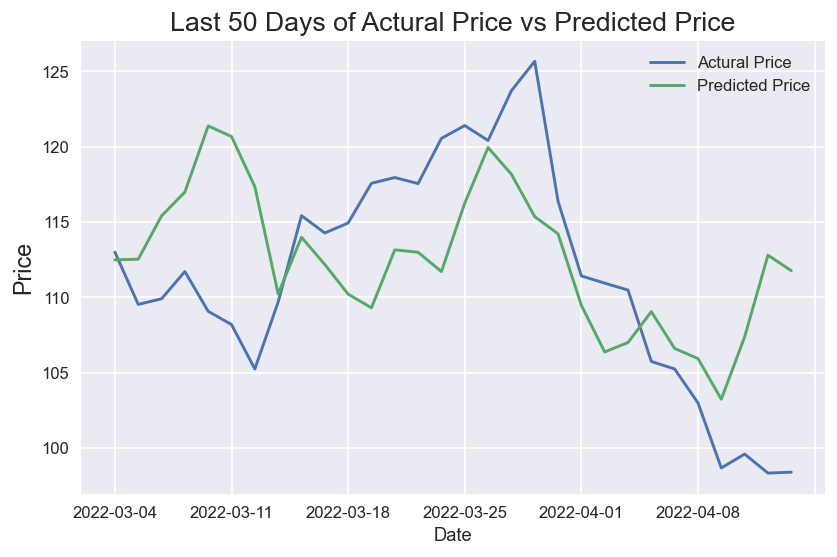

In [26]:
plot_pred_actural_price(result, price_to_show=50, predicted_price="High")

## Create ARIMAX model with different SMA length. 

I got best score with 50 day SMA so far with 2022-04-17 AMD data. I will predict 50 day SMA with 200 SMA as variable X. 

In [22]:
df = pd.read_csv(f"{symbol}-{date}", index_col="Date")
df.head()

df = preprocess_data(df, "High", SMA=True, sma_s=10, sma_m=20, sma_l=50, 
                     MACD=False, RSI=False, SOI=False, Bband=False).iloc[1: , :]
df.head()

Open      High       Low     Close  Adj Close  Volume  \
Date                                                                    
1980-05-29  3.145833  3.208333  3.072917  3.083333   3.083333  618000   
1980-05-30  3.083333  3.166667  3.031250  3.166667   3.166667  298800   
1980-06-02  3.166667  3.166667  3.104167  3.104167   3.104167  208800   
1980-06-03  3.104167  3.083333  3.010417  3.020833   3.020833  283200   
1980-06-04  3.020833  3.072917  3.000000  3.072917   3.072917  218400   

            DiffClose$  DiffOpen$  DiffHigh$  DiffLow$    Closep     Openp  \
Date                                                                         
1980-05-29   -0.062500   0.135416   0.062500  0.072917 -0.019868  0.044982   
1980-05-30    0.083334  -0.062500  -0.041666 -0.041667  0.027027 -0.019868   
1980-06-02   -0.062500   0.083334   0.000000  0.072917 -0.019737  0.027027   
1980-06-03   -0.083334  -0.062500  -0.083334 -0.093750 -0.026846 -0.019737   
1980-06-04    0.052084  -0.083334  -0.010416 -0.010417  0.017242 -0.026846   

               Highp      Lowp     SMA_s     SMA_m     SMA_l    smap_s  \
Date                                                                     
1980-05-29  0.019868  0.024306  2.909375  2.776042  2.723125  0.014525   
1980-05-30 -0.012987 -0.013559  2.948958  2.807292  2.724792  0.013601   
1980-06-02  0.000000  0.024055  2.991667  2.842187  2.726875  0.014729   
1980-06-03 -0.026316 -0.030201  3.029167  2.866146  2.728125  0.013238   
1980-06-04 -0.003378 -0.003460  3.061458  2.883333  2.731250  0.011362   

              smap_m    smap_l  
Date                            
1980-05-29  0.010423  0.001233  
1980-05-30  0.011361  0.001240  
1980-06-02  0.012796  0.001375  
1980-06-03  0.008737  0.001121  
1980-06-04  0.006168  0.001743

In [24]:
df_to_use = df["smap_m"]
test_size = 50
train = df_to_use[:-test_size]
train_X = df["smap_l"][:-test_size]
test = df_to_use[-test_size:]
train.shape, test.shape

((10511,), (50,))

In [25]:
sxmodel = pm.auto_arima(train, exogenous=train_X.to_numpy().reshape(-1, 1), max_p=50, max_q=50, seasonal=False, 
                        trace=True, error_action='ignore', suppress_warnings=True, random_state=1)
sxmodel.fit(train)
forecast = sxmodel.predict(n_periods=len(test))
forecast = pd.DataFrame(forecast, index = test.index, columns=['Prediction'])
forecast.head(15)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-98390.360, Time=6.08 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-75982.442, Time=2.54 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-98211.920, Time=2.36 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-83791.561, Time=4.70 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-98235.777, Time=13.83 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-98297.545, Time=7.19 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=-98247.884, Time=18.75 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=-98283.044, Time=8.41 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-98227.294, Time=3.82 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=-98235.357, Time=8.95 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=-98232.190, Time=5.27 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=-97701.881, Time=19.59 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-98387.231, Time=5.85 sec

Best model:  ARIMA(2,0,2)(0,0,0)[0]          
Total fit time: 107.371

Prediction
Date                  
2022-02-03   -0.006792
2022-02-04   -0.006308
2022-02-07   -0.005923
2022-02-08   -0.005587
2022-02-09   -0.005281
2022-02-10   -0.004995
2022-02-11   -0.004726
2022-02-14   -0.004472
2022-02-15   -0.004232
2022-02-16   -0.004005
2022-02-17   -0.003791
2022-02-18   -0.003587
2022-02-22   -0.003395
2022-02-23   -0.003213
2022-02-24   -0.003041

In [26]:
evaluate_preds(test, forecast)

{'mae': 0.0036314758,
 'mse': 2.116927e-05,
 'rmse': 0.0045637167,
 'mape': 184.90854,
 'mase': 1.674507}

In [27]:
result = price_inverse_sma(original_df=df, train_df=train, test_df=test, y_preds=forecast,
                         pred_column='smap_m', predict_price="Close", sma_length=20, 
                         model_name="ARIMA", data_used="AMD 2022-04-17", forecast_length=test_size)
result



I am predicting 50 days forecast. 
And 1st day forecast is $117.02
I predicted SMA20 on Close Dataset.
I used AMD 2022-04-17 data and predicted with ARIMA model. 
Direction Accuracy: 52.94%


Adj Close  PredictedPrice  DiffClose$  inverseDiff    Closep  \
Date                                                                        
2022-02-03  120.080002      117.017370   -2.680000    -5.742632 -0.021831   
2022-02-04  123.599998      118.317646    3.519997    -1.762356  0.029314   
2022-02-07  123.669998      115.276979    0.070000    -8.323019  0.000566   
2022-02-08  128.229996      116.102949    4.559998    -7.567049  0.036872   
2022-02-09  132.850006      121.600616    4.620010    -6.629380  0.036029   
2022-02-10  125.769997      122.109621   -7.080009   -10.740385 -0.053293   
2022-02-11  113.180000      118.653444  -12.589996    -7.116552 -0.100103   
2022-02-14  114.269997      122.209839    1.089996     9.029839  0.009631   
2022-02-15  121.470001      118.702151    7.200005     4.432154  0.063009   
2022-02-16  117.690002      115.709210   -3.779999    -5.760791 -0.031119   
2022-02-17  112.370003      110.422471   -5.320000    -7.267531 -0.045203   
2022-02-18  113.830002      108.127707    1.459999    -4.242296  0.012993   
2022-02-22  115.650002      106.306956    1.820000    -7.523046  0.015989   
2022-02-23  109.760002      101.219274   -5.889999   -14.430728 -0.050930   
2022-02-24  116.610001      101.617501    6.849998    -8.142501  0.062409   
2022-02-25  121.059998       92.519771    4.449997   -24.090230  0.038161   
2022-02-28  123.339996       94.919121    2.279999   -26.140877  0.018834   
2022-03-01  113.830002      105.303594   -9.509995   -18.036402 -0.077104   
2022-03-02  118.279999      108.796259    4.449997    -5.033743  0.039093   
2022-03-03  111.980003      114.791647   -6.299995    -3.488352 -0.053263   
2022-03-04  108.410004      112.474382   -3.570000     0.494379 -0.031881   
2022-03-07  102.949997      115.776647   -5.460007     7.366644 -0.050364   
2022-03-08  105.529999      115.417166    2.580002    12.467169  0.025061   
2022-03-09  111.050003      119.777481    5.520004    14.247482  0.052307   
2022-03-10  106.459999      124.455518   -4.590004    13.405515 -0.041333   
2022-03-11  104.290001      118.238164   -2.169998    11.778165 -0.020383   
2022-03-14  102.250000      107.699547   -2.040001     3.409546 -0.019561   
2022-03-15  109.330002      108.749777    7.080002     6.499777  0.069242   
2022-03-16  115.370003      115.772491    6.040001     6.442489  0.055246   
2022-03-17  111.690002      112.378471   -3.680000    -2.991531 -0.031897   
2022-03-18  113.459999      107.467079    1.769997    -4.222923  0.015847   
2022-03-21  115.919998      108.999464    2.459999    -4.460536  0.021682   
2022-03-22  114.779999      110.850959   -1.139999    -5.069039 -0.009834   
2022-03-23  113.919998      105.182718   -0.860001    -9.597281 -0.007493   
2022-03-24  120.529999      112.488187    6.610001    -1.431811  0.058023   
2022-03-25  119.669998      116.751722   -0.860001    -3.778277 -0.007135   
2022-03-28  120.239998      119.149041    0.570000    -0.520957  0.004763   
2022-03-29  123.230003      109.989527    2.990005   -10.250471  0.024867   
2022-03-30  119.220001      114.590899   -4.010002    -8.639105 -0.032541   
2022-03-31  109.339996      108.495068   -9.880005   -10.724933 -0.082872   
2022-04-01  108.190002      105.169175   -1.149994    -4.170821 -0.010518   
2022-04-04  110.529999       99.836226    2.339996    -8.353777  0.021629   
2022-04-05  106.820000      102.456313   -3.709999    -8.073686 -0.033566   
2022-04-06  103.669998      108.264729   -3.150002     1.444729 -0.029489   
2022-04-07  103.720001      103.912664    0.050003     0.242665  0.000482   
2022-04-08  101.000000      101.863370   -2.720001    -1.856632 -0.026224   
2022-04-11   97.370003       99.924765   -3.629997    -1.075235 -0.035941   
2022-04-12   95.099998      106.629500   -2.270004     9.259498 -0.023313   
2022-04-13   97.739998      111.664901    2.639999    16.564902  0.027760   
2022-04-14   93.059998      108.982768   -4.680000    11.242770 -0.047882   

        

In [28]:
evaluate_result(result)

{'mae': 7.5764427,
 'mse': 96.32471,
 'rmse': 9.814515,
 'mape': 6.7344255,
 'mase': 1.922955}

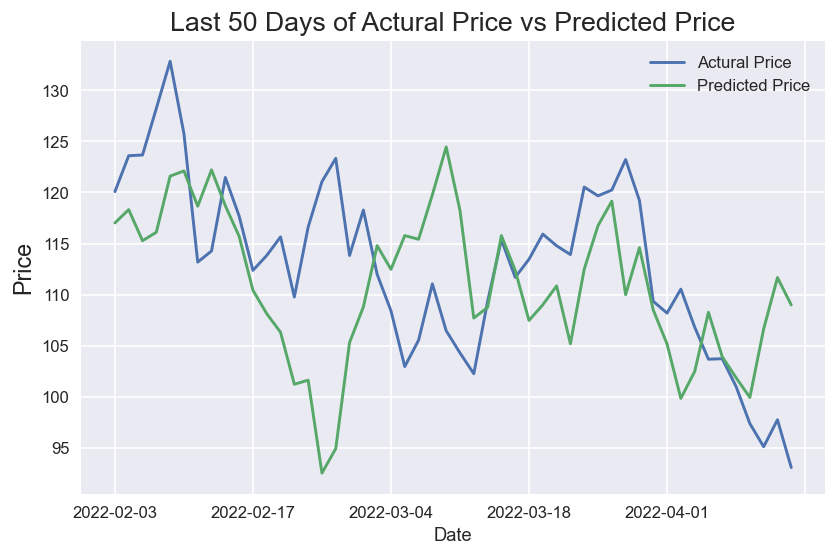

In [29]:
plot_pred_actural_price(result, price_to_show=50)

## Predict tomorrow's price with ARIMAX model

In [3]:
pred_val = "smap_m"
extra_val = "smap_l"
forecast_len = 10
pred_sma = 20
for key, original_df in dfs.items():
    df_to_use = original_df[pred_val]
    train = df_to_use
    train_X = original_df[extra_val]
    
    # Train with ARIMAX model and predict forecast
    sxmodel = pm.auto_arima(train, exogenous=train_X.to_numpy().reshape(-1, 1), max_p=5, max_q=5, seasonal=False, 
                        trace=True, error_action='ignore', suppress_warnings=True)
    sxmodel.fit(train)
    forecast = sxmodel.predict(n_periods=forecast_len)
    forecast = pd.DataFrame(forecast, columns=['Prediction'])

    if key == "Open":
        cols = ["Open", "DiffOpen$", "Openp", pred_val]
    elif key == "Close":
        cols = ["Adj Close", "DiffClose$", "Closep", pred_val]
    elif key == "High":
        cols = ["High", "DiffHigh$", "Highp", pred_val]
    else:
        cols = ["Low", "DiffLow$", "Lowp", pred_val]
        
    prev_price = np.round(original_df[cols[0]][-1], 2)
        
    df = original_df[cols].tail(pred_sma-1)
        
    dates = pd.date_range(datetime.today(), periods=forecast_len).strftime("%Y-%m-%d").tolist()
    forecast["Date"] = dates
    forecast["Date"] = pd.to_datetime(forecast['Date'])
    forecast.set_index("Date", inplace=True)
    
    df = pd.concat([df, forecast])
    
    start = 0
    end = pred_sma - 1
    for i in range(len(df)):
        try:
            sma_sum = df["Prediction"].iloc[end] * pred_sma
            inv = sma_sum - sum(df[cols[2]].values[start: end])
            df[cols[2]].iloc[end] = inv
            start += 1
            end += 1
        except:
            i > forecast_len-1
    
    df = df.fillna(0)
    df["inverseDiff"] = 0
    for i in range(len(df)):
        inverse = df[cols[2]].iloc[i] * df[cols[0]].iloc[i-1]
        df["inverseDiff"].iloc[i] = inverse
        if df[cols[0]].iloc[i] == 0:
            df[cols[0]].iloc[i] = df["inverseDiff"].iloc[i] + df[cols[0]].iloc[i-1]
            
    # Define outputs
    future_forecast = df[cols[0]][-forecast_len:]
    tomorrow_forecast = np.round(future_forecast[0], 2)
    change = np.round((tomorrow_forecast - prev_price) / prev_price * 100, 2)
    
    # Print 
    print(f"Next {forecast_len} days forecast for {key} price:\n{future_forecast}")
    print(f"Tomorrow's price is ${tomorrow_forecast} and changed {change}% from previous price ${prev_price}")

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-93680.985, Time=16.11 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-70785.376, Time=1.94 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-93915.795, Time=2.51 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-78992.808, Time=3.95 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-93914.140, Time=3.79 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-93914.131, Time=7.09 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-94792.582, Time=23.56 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=-93912.200, Time=6.14 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-93914.105, Time=6.12 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=-93914.283, Time=6.38 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=-94438.699, Time=17.85 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-93912.370, Time=12.37 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0]          
Total fit time: 107.961 seconds
Next 10 days forecast for Close price:
Date
2022-05-11    

In [7]:
futre_forecast, tomorrow_forecast, change, df = future_forecast(original_df=df_close[:-2], key="Close")

TypeError: 'Series' object is not callable

In [37]:
results = {"future_forecast_df": future_forecast, "whole_result_df": df, "tomorrow_price": tomorrow_forecast, "%_change": change}

In [39]:
results["whole_result_df"]

Open  DiffOpen$     Openp    smap_m  Prediction  inverseDiff
Date                                                                         
2022-04-12  98.779999   0.180000  0.001826 -0.001388    0.000000     0.000000
2022-04-13  95.300003  -3.479996 -0.035230 -0.007503    0.000000    -3.479996
2022-04-14  98.370003   3.070000  0.032214 -0.006134    0.000000     3.070000
2022-04-18  92.029999  -6.340004 -0.064451 -0.008974    0.000000    -6.340004
2022-04-19  93.389999   1.360001  0.014778 -0.009335    0.000000     1.360001
2022-04-20  97.839996   4.449997  0.047650 -0.007700    0.000000     4.449997
2022-04-21  95.160004  -2.679993 -0.027392 -0.008576    0.000000    -2.679993
2022-04-22  90.029999  -5.130005 -0.053909 -0.011565    0.000000    -5.130005
2022-04-25  89.860001  -0.169998 -0.001888 -0.013816    0.000000    -0.169998
2022-04-26  89.739998  -0.120003 -0.001335 -0.012958    0.000000    -0.120003
2022-04-27  84.250000  -5.489998 -0.061177 -0.017962    0.000000    -5.489998
2022-04-28  86.669998   2.419998  0.028724 -0.016837    0.000000     2.419998
2022-04-29  88.050003   1.380005  0.015923 -0.013306    0.000000     1.380005
2022-05-02  85.660004  -2.389999 -0.027144 -0.012157    0.000000    -2.389999
2022-05-03  89.849998   4.189995  0.048914 -0.009480    0.000000     4.189995
2022-05-04  98.180000   8.330002  0.092710 -0.004717    0.000000     8.330002
2022-05-05  97.650002  -0.529999 -0.005398 -0.002599    0.000000    -0.529999
2022-05-06  94.339996  -3.310005 -0.033897 -0.004040    0.000000    -3.310005
2022-05-09  92.870003  -1.469994 -0.015582 -0.004140    0.000000    -1.469994
2022-05-10  89.768941   0.000000 -0.033391  0.000000   -0.003903    -3.101062
2022-05-11  90.370694   0.000000  0.006703  0.000000   -0.003659     0.601754
2022-05-12  87.582928   0.000000 -0.030848  0.000000   -0.003440    -2.787766
2022-05-13  90.786549   0.000000  0.036578  0.000000   -0.003222     3.203621
2022-05-14  85.299539   0.000000 -0.060439  0.000000   -0.003021    -5.487010
2022-05-15  86.894808   0.000000  0.018702  0.000000   -0.002825     1.595269
2022-05-16  91.353186   0.000000  0.051308  0.000000   -0.002642     4.458378
2022-05-17  89.174216   0.000000 -0.023852  0.000000   -0.002465    -2.178970
2022-05-18  84.663604   0.000000 -0.050582  0.000000   -0.002299    -4.510612
2022-05-19  84.774525   0.000000  0.001310  0.000000   -0.002139     0.110921

## Create function to get future forecast

In [32]:
def future_forecast(original_df, key, pred_val="smap_m", extra_val="smap_l", forecast_len=10, pred_sma=20):
    df_to_use = original_df[pred_val]
    train = df_to_use
    train_X = original_df[extra_val]
    
    # Train with ARIMAX model and predict forecast
    sxmodel = pm.auto_arima(train, exogenous=train_X.to_numpy().reshape(-1, 1), max_p=5, max_q=5, seasonal=False, 
                        trace=True, error_action='ignore', suppress_warnings=True)
    sxmodel.fit(train)
    forecast = sxmodel.predict(n_periods=forecast_len)
    forecast = pd.DataFrame(forecast, columns=['Prediction'])
    
    # Obtain columns name 
    if key == "Open":
        cols = ["Open", "DiffOpen$", "Openp", pred_val]
    elif key == "Close":
        cols = ["Adj Close", "DiffClose$", "Closep", pred_val]
    elif key == "High":
        cols = ["High", "DiffHigh$", "Highp", pred_val]
    else:
        cols = ["Low", "DiffLow$", "Lowp", pred_val]
        
    # Get previous price for later print and calculation
    prev_price = np.round(original_df[cols[0]][-1], 2)
        
    # create df to inverse SMA to actual price
    df = original_df[cols].tail(pred_sma-1)
    # Create list of future dates then make Datframe with forecast. Set Date as index.     
    dates = pd.date_range(datetime.today(), periods=forecast_len).strftime("%Y-%m-%d").tolist()
    forecast["Date"] = dates
    forecast["Date"] = pd.to_datetime(forecast['Date'])
    forecast.set_index("Date", inplace=True)
    # Concat created df and forecast
    df = pd.concat([df, forecast])
    
    start = 0
    end = pred_sma - 1
    for i in range(len(df)):
        try:
            sma_sum = df["Prediction"].iloc[end] * pred_sma
            inv = sma_sum - sum(df[cols[2]].values[start: end])
            df[cols[2]].iloc[end] = inv
            start += 1
            end += 1
        except:
            i > forecast_len-1
            
    # Inverse process
    df = df.fillna(0)
    df["inverseDiff"] = 0
    for i in range(len(df)):
        inverse = df[cols[2]].iloc[i] * df[cols[0]].iloc[i-1]
        df["inverseDiff"].iloc[i] = inverse
        if df[cols[0]].iloc[i] == 0:
            df[cols[0]].iloc[i] = df["inverseDiff"].iloc[i] + df[cols[0]].iloc[i-1]
    
    # Define outputs
    future_forecast = df[cols[0]][-forecast_len:]
    tomorrow_forecast = np.round(future_forecast[0], 2)
    change = np.round((tomorrow_forecast - prev_price) / prev_price * 100, 2)
    
    # Print 
    print(f"Next {forecast_len} days forecast for {key} price:\n{future_forecast}")
    print(f"Tomorrow's price is ${tomorrow_forecast} and changed {change}% from previous price ${prev_price}")
    
    return future_forecast, tomorrow_forecast, change, df

In [5]:
df_to_use = dfs["Low"]["smap_m"]
test_size = 50
train = df_to_use
train_X = dfs["Low"]["smap_l"]
test = df_to_use[-test_size:]
forecast_len = 10

In [6]:
sxmodel = pm.auto_arima(train, exogenous=train_X.to_numpy().reshape(-1, 1), max_p=5, max_q=5, seasonal=False, 
                        trace=True, error_action='ignore', suppress_warnings=True)
sxmodel.fit(train)
forecast = sxmodel.predict(n_periods=forecast_len)
forecast = pd.DataFrame(forecast, columns=['Prediction'])
forecast.head(15)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-94233.504, Time=13.40 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-70777.477, Time=1.73 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-93905.623, Time=1.77 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-78984.557, Time=3.26 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-93903.935, Time=3.42 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-94862.399, Time=13.81 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-93903.958, Time=2.94 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-93903.968, Time=2.93 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=-93902.031, Time=4.33 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=-93904.113, Time=3.29 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=-94353.569, Time=15.65 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-94862.455, Time=12.80 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-93901.961, Time=3.23 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-93901.970, Time=3.19 sec
 

Prediction
0   -0.003903
1   -0.003659
2   -0.003440
3   -0.003222
4   -0.003021
5   -0.002825
6   -0.002642
7   -0.002465
8   -0.002299
9   -0.002139

In [24]:
cols_high = ["High", "DiffHigh$", "Highp", "smap_m"]
cols_close = ["Adj Close", "DiffClose$", "Closep", "smap_m"]
cols_low = ["Low", "DiffLow$", "Lowp", "smap_m"]
cols_open = ["Open", "DiffOpen$", "Openp", "smap_m"]
df = dfs["Low"][cols_low].tail(19)
#df["Prediction"] = df["smap_m"]
df

Low  DiffLow$      Lowp    smap_m
Date                                               
2022-04-12  94.599998 -1.340004 -0.013967 -0.001388
2022-04-13  94.709999  0.110001  0.001163 -0.007503
2022-04-14  92.919998 -1.790001 -0.018900 -0.006134
2022-04-18  91.639999 -1.279999 -0.013775 -0.008974
2022-04-19  92.839996  1.199997  0.013095 -0.009335
2022-04-20  93.199997  0.360001  0.003878 -0.007700
2022-04-21  89.239998 -3.959999 -0.042489 -0.008576
2022-04-22  87.940002 -1.299995 -0.014567 -0.011565
2022-04-25  88.610001  0.669998  0.007619 -0.013816
2022-04-26  85.080002 -3.529999 -0.039837 -0.012958
2022-04-27  84.019997 -1.060005 -0.012459 -0.017962
2022-04-28  84.779999  0.760002  0.009045 -0.016837
2022-04-29  85.379997  0.599998  0.007077 -0.013306
2022-05-02  85.320000 -0.059998 -0.000703 -0.012157
2022-05-03  89.010002  3.690002  0.043249 -0.009480
2022-05-04  91.699997  2.689995  0.030221 -0.004717
2022-05-05  92.169998  0.470001  0.005125 -0.002599
2022-05-06  92.650002  0.480003  0.005208 -0.004040
2022-05-09  85.379997 -7.270004 -0.078467 -0.004140

In [25]:
dates = pd.date_range(datetime.today(), periods=forecast_len).strftime("%Y-%m-%d").tolist()
forecast["Date"] = dates
forecast

Prediction        Date
Date                              
2022-05-10   -0.003903  2022-05-10
2022-05-11   -0.003659  2022-05-11
2022-05-12   -0.003440  2022-05-12
2022-05-13   -0.003222  2022-05-13
2022-05-14   -0.003021  2022-05-14
2022-05-15   -0.002825  2022-05-15
2022-05-16   -0.002642  2022-05-16
2022-05-17   -0.002465  2022-05-17
2022-05-18   -0.002299  2022-05-18
2022-05-19   -0.002139  2022-05-19

In [26]:
forecast["Date"] = pd.to_datetime(forecast['Date'])
forecast.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10 entries, 2022-05-10 to 2022-05-19
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Prediction  10 non-null     float64       
 1   Date        10 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 240.0 bytes


In [27]:
df = pd.concat([df, forecast])
df.drop("Date", axis=1, inplace=True)

In [28]:
forecast.set_index("Date", inplace=True)
forecast

Prediction
Date                  
2022-05-10   -0.003903
2022-05-11   -0.003659
2022-05-12   -0.003440
2022-05-13   -0.003222
2022-05-14   -0.003021
2022-05-15   -0.002825
2022-05-16   -0.002642
2022-05-17   -0.002465
2022-05-18   -0.002299
2022-05-19   -0.002139

In [29]:
start = 0
end = 19
for i in range(len(df)):
    try:
        sma_sum = df["Prediction"].iloc[end] * 20
        inv = sma_sum - sum(df["Lowp"].values[start: end])
        df["Lowp"].iloc[end] = inv
        start += 1
        end += 1
    except:
        i > 9
df

Low  DiffLow$      Lowp    smap_m  Prediction
Date                                                           
2022-04-12  94.599998 -1.340004 -0.013967 -0.001388         NaN
2022-04-13  94.709999  0.110001  0.001163 -0.007503         NaN
2022-04-14  92.919998 -1.790001 -0.018900 -0.006134         NaN
2022-04-18  91.639999 -1.279999 -0.013775 -0.008974         NaN
2022-04-19  92.839996  1.199997  0.013095 -0.009335         NaN
2022-04-20  93.199997  0.360001  0.003878 -0.007700         NaN
2022-04-21  89.239998 -3.959999 -0.042489 -0.008576         NaN
2022-04-22  87.940002 -1.299995 -0.014567 -0.011565         NaN
2022-04-25  88.610001  0.669998  0.007619 -0.013816         NaN
2022-04-26  85.080002 -3.529999 -0.039837 -0.012958         NaN
2022-04-27  84.019997 -1.060005 -0.012459 -0.017962         NaN
2022-04-28  84.779999  0.760002  0.009045 -0.016837         NaN
2022-04-29  85.379997  0.599998  0.007077 -0.013306         NaN
2022-05-02  85.320000 -0.059998 -0.000703 -0.012157         NaN
2022-05-03  89.010002  3.690002  0.043249 -0.009480         NaN
2022-05-04  91.699997  2.689995  0.030221 -0.004717         NaN
2022-05-05  92.169998  0.470001  0.005125 -0.002599         NaN
2022-05-06  92.650002  0.480003  0.005208 -0.004040         NaN
2022-05-09  85.379997 -7.270004 -0.078467 -0.004140         NaN
2022-05-10        NaN       NaN  0.031430       NaN   -0.003903
2022-05-11        NaN       NaN -0.009089       NaN   -0.003659
2022-05-12        NaN       NaN  0.005544       NaN   -0.003440
2022-05-13        NaN       NaN -0.014536       NaN   -0.003222
2022-05-14        NaN       NaN -0.009763       NaN   -0.003021
2022-05-15        NaN       NaN  0.017019       NaN   -0.002825
2022-05-16        NaN       NaN  0.007536       NaN   -0.002642
2022-05-17        NaN       NaN -0.038950       NaN   -0.002465
2022-05-18        NaN       NaN -0.011240       NaN   -0.002299
2022-05-19        NaN       NaN  0.010817       NaN   -0.002139

In [104]:
 np.round(future_forecast[0], 2)

81.34

In [31]:
df = df.fillna(0)
df["inverseDiff"] = 0
for i in range(len(df)):
    inverse = df["Lowp"].iloc[i] * df["Low"].iloc[i-1]
    df["inverseDiff"].iloc[i] = inverse
    if df["Low"].iloc[i] == 0:
        df["Low"].iloc[i] = df["inverseDiff"].iloc[i] + df["Low"].iloc[i-1]
future_forecast = df["Low"][-10:]
future_forecast

Low  DiffLow$      Lowp    smap_m  Prediction  inverseDiff
Date                                                                        
2022-04-12  94.599998 -1.340004 -0.013967 -0.001388    0.000000    -1.177110
2022-04-13  94.709999  0.110001  0.001163 -0.007503    0.000000     0.110001
2022-04-14  92.919998 -1.790001 -0.018900 -0.006134    0.000000    -1.790001
2022-04-18  91.639999 -1.279999 -0.013775 -0.008974    0.000000    -1.279999
2022-04-19  92.839996  1.199997  0.013095 -0.009335    0.000000     1.199997
2022-04-20  93.199997  0.360001  0.003878 -0.007700    0.000000     0.360001
2022-04-21  89.239998 -3.959999 -0.042489 -0.008576    0.000000    -3.959999
2022-04-22  87.940002 -1.299995 -0.014567 -0.011565    0.000000    -1.299995
2022-04-25  88.610001  0.669998  0.007619 -0.013816    0.000000     0.669998
2022-04-26  85.080002 -3.529999 -0.039837 -0.012958    0.000000    -3.529999
2022-04-27  84.019997 -1.060005 -0.012459 -0.017962    0.000000    -1.060005
2022-04-28  84.779999  0.760002  0.009045 -0.016837    0.000000     0.760002
2022-04-29  85.379997  0.599998  0.007077 -0.013306    0.000000     0.599998
2022-05-02  85.320000 -0.059998 -0.000703 -0.012157    0.000000    -0.059998
2022-05-03  89.010002  3.690002  0.043249 -0.009480    0.000000     3.690002
2022-05-04  91.699997  2.689995  0.030221 -0.004717    0.000000     2.689995
2022-05-05  92.169998  0.470001  0.005125 -0.002599    0.000000     0.470001
2022-05-06  92.650002  0.480003  0.005208 -0.004040    0.000000     0.480003
2022-05-09  85.379997 -7.270004 -0.078467 -0.004140    0.000000    -7.270004
2022-05-10  88.063479  0.000000  0.031430  0.000000   -0.003903     2.683481
2022-05-11  87.263043  0.000000 -0.009089  0.000000   -0.003659    -0.800436
2022-05-12  87.746867  0.000000  0.005544  0.000000   -0.003440     0.483824
2022-05-13  86.471403  0.000000 -0.014536  0.000000   -0.003222    -1.275464
2022-05-14  85.627159  0.000000 -0.009763  0.000000   -0.003021    -0.844244
2022-05-15  87.084435  0.000000  0.017019  0.000000   -0.002825     1.457276
2022-05-16  87.740686  0.000000  0.007536  0.000000   -0.002642     0.656251
2022-05-17  84.323202  0.000000 -0.038950  0.000000   -0.002465    -3.417484
2022-05-18  83.375394  0.000000 -0.011240  0.000000   -0.002299    -0.947807
2022-05-19  84.277282  0.000000  0.010817  0.000000   -0.002139     0.901887

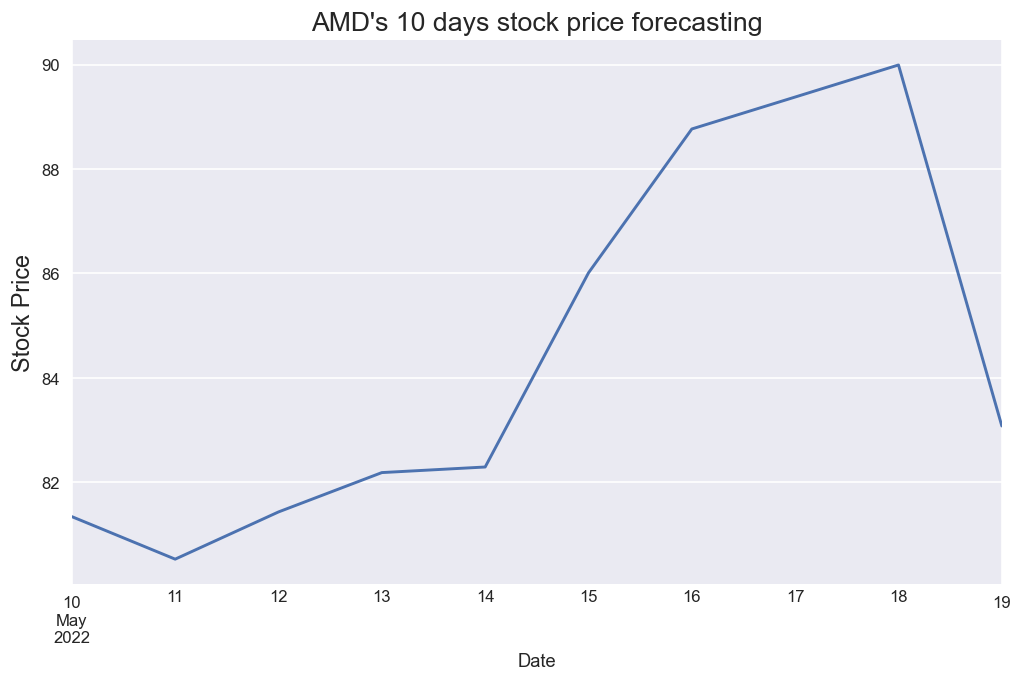

In [95]:
plt.figure(figsize=(10, 6))
df["Low"].tail(10).plot()
plt.title(f"{symbol}'s 10 days stock price forecasting", fontsize=16)
plt.ylabel("Stock Price", fontsize=14) 
plt.show();

## How I create inverse function for SMA.

def price_inverse_sma(original_df, train_df, test_df, y_preds, pred_column, 
                      predict_price, sma_length, model_name, data_used, forecast_length):
    """
    From the percent change prediction, inverse to the original price. 
    
    original_df: Data Frame before any preprocess. 
    train_df: Data used to train. This data is to calculate SMA by taking last sma_length data. 
    test_df: Data used to test. 
    y_preds: Predict result.
    pred_column: Which value predicted. This time which length of SMA predicted. The purpose is to 
                 add correct Series when you do inverse process.
    predict_price: What price are you predicted.["Open", "Close", "High", "Low"]
    sma_length: Length of SMA.
    model_name: Which model to get the forecast. 
    data_used: Which data you used. "Symbol" and "Date"
    forecast_length: How many days of forecast. 
    
    return: dataframe with inversed price, inversed difference then drop 1st row. 
    """
    # Get columns based on which prediction you did.
    if predict_price == "Open":
        columns = ["Open", "DiffOpen$", "Openp", pred_column]
    elif predict_price == "Close":
        columns = ["Adj Close", "DiffClose$", "Closep", pred_column]
    elif predict_price == "High":
        columns = ["High", "DiffHigh$", "Highp", pred_column]
    else:
        columns = ["Low", "DiffLow$", "Lowp", pred_column]
    # DataFrame for testing part
    convert_df = original_df[columns].tail(len(test_df))
    convert_df["Prediction"] = y_preds
    # Add end of train data to be able to inverse moving average
    add_df = original_df[columns][-(len(test)+(sma_length-1)): -len(test_df)]
    add_df["Prediction"] = add_df[columns[3]]
    # Concat aboves together
    convert_df = pd.concat([add_df, convert_df], ignore_index=False, sort=False)
    
    #print(convert_df.head())
    
    # Calculate predicted Closep by inversing SMA. 
    invs = []
    start = 0
    end = sma_length - 1
    for i in range(len(convert_df)):
        try:
            sma_sum = convert_df["Prediction"].iloc[end] * sma_length
            inv = sma_sum - sum(convert_df[columns[2]].values[start:end])
            invs.append(inv)
            start += 1
            end += 1
        except:
            i > len(test_df) - 1
    #print(invs)
    # Keep last day of training data to be able to get first day forecast
    convert_df = convert_df.tail(len(y_preds)+1)
    later_add = convert_df.head(1)
    later_add["Inversed_Closep"] = convert_df[columns[2]].iloc[0]
    # Split dataset for testing data length so I can add inveresed number I got previously
    convert_df = convert_df.tail(len(y_preds))
    convert_df["Inversed_Closep"] = invs
    # Concat last day of training data
    convert_df = pd.concat([later_add, convert_df], ignore_index=False, sort=False)
    #print(convert_df.head())
    
    inverse_diff = []
    for i in range(len(convert_df)):
        inverse = convert_df["Inversed_Closep"].iloc[i] * convert_df[columns[0]].iloc[i-1]
        inverse_diff.append(inverse)
    convert_df["inverseDiff"] = inverse_diff
    
    pred_price = []
    for i in range(len(convert_df)):
        pred = convert_df["inverseDiff"].iloc[i] + convert_df["Adj Close"].iloc[i-1]
        pred_price.append(pred)
    convert_df["PredictedPrice"] = pred_price
    
    tomorrow_price = np.round(convert_df["PredictedPrice"].iloc[1], 2)
    
    convert_df["ActualDirection"] = "NaN"
    convert_df["PredictedDirection"] = "NaN"
    for i in range(len(convert_df)):
        if convert_df[columns[1]].iloc[i] > 0:
            convert_df["ActualDirection"].iloc[i] = "UP"
        elif convert_df[columns[1]].iloc[i] < 0:
            convert_df["ActualDirection"].iloc[i] = "DOWN"
        elif convert_df[columns[1]].iloc[i] == 0:
            convert_df["ActualDirection"].iloc[i] = "SAME"
        
    for i in range(len(convert_df)):
        if convert_df["inverseDiff"].iloc[i] > 0:
            convert_df["PredictedDirection"].iloc[i] = "UP"
        elif convert_df["inverseDiff"].iloc[i] < 0:
            convert_df["PredictedDirection"].iloc[i] = "DOWN"
        elif convert_df["inverseDiff"].iloc[i] == 0:
            convert_df["PredictedDirection"].iloc[i] = "SAME"    
            
    #print(convert_df.head())
    
    df_len = len(convert_df)
    unique, counts = np.unique(np.where(convert_df["ActualDirection"] == convert_df["PredictedDirection"]), return_counts=True)
    right_direc = sum(counts)
    accuracy = right_direc / df_len * 100
    # Change columns order for better visualization
    cols = convert_df.columns.tolist()
    new_cols = [cols[0], cols[7], cols[1], cols[6], cols[2], cols[5], cols[3], cols[4], cols[8], cols[9]]
    convert_df = convert_df[new_cols]
    
    print("\n")
    print(f"I am predicting {forecast_length} days forecast. ")
    print(f"And 1st day forecast is ${tomorrow_price}")
    print(f"I predicted SMA{str(sma_length)} on {predict_price} Dataset.")
    print(f"I used {data_used} data and predicted with {model_name} model. ")                        
    print(f"Direction Accuracy: {np.round(accuracy, 2)}%")
    
    return convert_df.iloc[1:, :]

In [42]:
# Add end of train data to be able to inverse moving average
sma_length = 10
add_df = df[["Adj Close", "DiffClose$", "Closep", 'smap10']][-(len(test)+(sma_length-1)): -len(test)]
add_df["Prediction"] = add_df["smap10"]
# DataFrame for testing part 
convert_df = df[["Adj Close", "DiffClose$", "Closep", 'smap10']].tail(len(test))
convert_df["Prediction"] = forecast
# Concat aboves together
convert_df = pd.concat([add_df, convert_df], ignore_index=False, sort=False)

convert_df

Adj Close  DiffClose$    Closep    smap10  Prediction
Date                                                              
2022-03-14  102.250000   -2.040001 -0.019561 -0.017743   -0.017743
2022-03-15  109.330002    7.080002  0.069242 -0.003108   -0.003108
2022-03-16  115.370003    6.040001  0.055246 -0.001493   -0.001493
2022-03-17  111.690002   -3.680000 -0.031897  0.000644    0.000644
2022-03-18  113.459999    1.769997  0.015847  0.005416    0.005416
2022-03-21  115.919998    2.459999  0.021682  0.012621    0.012621
2022-03-22  114.779999   -1.139999 -0.009834  0.009132    0.009132
2022-03-23  113.919998   -0.860001 -0.007493  0.003152    0.003152
2022-03-24  120.529999    6.610001  0.058023  0.013087    0.013087
2022-03-25  119.669998   -0.860001 -0.007135  0.014412    0.016256
2022-03-28  120.239998    0.570000  0.004763  0.016844    0.018644
2022-03-29  123.230003    2.990005  0.024867  0.012407    0.011278
2022-03-30  119.220001   -4.010002 -0.032541  0.003628    0.008025
2022-03-31  109.339996   -9.880005 -0.082872 -0.001469    0.011663
2022-04-01  108.190002   -1.149994 -0.010518 -0.004106    0.010164
2022-04-04  110.529999    2.339996  0.021629 -0.004111    0.008878
2022-04-05  106.820000   -3.709999 -0.033566 -0.006484    0.007774
2022-04-06  103.669998   -3.150002 -0.029489 -0.008684    0.006825
2022-04-07  103.720001    0.050003  0.000482 -0.014438    0.006011
2022-04-08  101.000000   -2.720001 -0.026224 -0.016347    0.005312
2022-04-11   97.370003   -3.629997 -0.035941 -0.020417    0.004712
2022-04-12   95.099998   -2.270004 -0.023313 -0.025235    0.004197
2022-04-13   97.739998    2.639999  0.027760 -0.019205    0.003754
2022-04-14   93.059998   -4.680000 -0.047882 -0.015706    0.003374

In [43]:
# Idea is right but I think I need to add preiction 
invs = []
start = 0
end = 9
for i in range(len(convert_df)):
    try:
        sma_sum = convert_df["Prediction"].iloc[end] * 10
        inv = sma_sum - sum(convert_df['Closep'].values[start:end])
        invs.append(inv)
        start += 1
        end += 1
    except:
        i > 14
invs

[0.01130322341829687,
 0.022763927452209648,
 0.013582394541704318,
 0.01142510472412149,
 0.04844656470245544,
 0.13218453344998116,
 0.15152074449529673,
 0.10901366381697764,
 0.12560416042367736,
 0.20497463306486746,
 0.19036682127649898,
 0.21535251897510083,
 0.27100689536900124,
 0.2573547928272283,
 0.1429236606309164]

In [44]:
convert_df = convert_df.tail(len(forecast)+1)
convert_df

Adj Close  DiffClose$    Closep    smap10  Prediction
Date                                                              
2022-03-24  120.529999    6.610001  0.058023  0.013087    0.013087
2022-03-25  119.669998   -0.860001 -0.007135  0.014412    0.016256
2022-03-28  120.239998    0.570000  0.004763  0.016844    0.018644
2022-03-29  123.230003    2.990005  0.024867  0.012407    0.011278
2022-03-30  119.220001   -4.010002 -0.032541  0.003628    0.008025
2022-03-31  109.339996   -9.880005 -0.082872 -0.001469    0.011663
2022-04-01  108.190002   -1.149994 -0.010518 -0.004106    0.010164
2022-04-04  110.529999    2.339996  0.021629 -0.004111    0.008878
2022-04-05  106.820000   -3.709999 -0.033566 -0.006484    0.007774
2022-04-06  103.669998   -3.150002 -0.029489 -0.008684    0.006825
2022-04-07  103.720001    0.050003  0.000482 -0.014438    0.006011
2022-04-08  101.000000   -2.720001 -0.026224 -0.016347    0.005312
2022-04-11   97.370003   -3.629997 -0.035941 -0.020417    0.004712
2022-04-12   95.099998   -2.270004 -0.023313 -0.025235    0.004197
2022-04-13   97.739998    2.639999  0.027760 -0.019205    0.003754
2022-04-14   93.059998   -4.680000 -0.047882 -0.015706    0.003374

In [45]:
add_df = convert_df.head(1)
convert_df = convert_df.tail(len(forecast))
convert_df["Inveresed_Closep"] = invs
inverse_diff = []
for i in range(len(convert_df)):
    inverse = convert_df["Inveresed_Closep"].iloc[i] * convert_df["Adj Close"].iloc[i-1]
    inverse_diff.append(inverse)
convert_df["inverseDiff"] = inverse_diff
convert_df = pd.concat([add_df, convert_df])
convert_df

Adj Close  DiffClose$    Closep    smap10  Prediction  \
Date                                                                 
2022-03-24  120.529999    6.610001  0.058023  0.013087    0.013087   
2022-03-25  119.669998   -0.860001 -0.007135  0.014412    0.016256   
2022-03-28  120.239998    0.570000  0.004763  0.016844    0.018644   
2022-03-29  123.230003    2.990005  0.024867  0.012407    0.011278   
2022-03-30  119.220001   -4.010002 -0.032541  0.003628    0.008025   
2022-03-31  109.339996   -9.880005 -0.082872 -0.001469    0.011663   
2022-04-01  108.190002   -1.149994 -0.010518 -0.004106    0.010164   
2022-04-04  110.529999    2.339996  0.021629 -0.004111    0.008878   
2022-04-05  106.820000   -3.709999 -0.033566 -0.006484    0.007774   
2022-04-06  103.669998   -3.150002 -0.029489 -0.008684    0.006825   
2022-04-07  103.720001    0.050003  0.000482 -0.014438    0.006011   
2022-04-08  101.000000   -2.720001 -0.026224 -0.016347    0.005312   
2022-04-11   97.370003   -3.629997 -0.035941 -0.020417    0.004712   
2022-04-12   95.099998   -2.270004 -0.023313 -0.025235    0.004197   
2022-04-13   97.739998    2.639999  0.027760 -0.019205    0.003754   
2022-04-14   93.059998   -4.680000 -0.047882 -0.015706    0.003374   

            Inveresed_Closep  inverseDiff  
Date                                       
2022-03-24               NaN          NaN  
2022-03-25          0.011303     1.051878  
2022-03-28          0.022764     2.724159  
2022-03-29          0.013582     1.633147  
2022-03-30          0.011425     1.407916  
2022-03-31          0.048447     5.775800  
2022-04-01          0.132185    14.453056  
2022-04-04          0.151521    16.393030  
2022-04-05          0.109014    12.049280  
2022-04-06          0.125604    13.417036  
2022-04-07          0.204975    21.249720  
2022-04-08          0.190367    19.744847  
2022-04-11          0.215353    21.750604  
2022-04-12          0.271007    26.387942  
2022-04-13          0.257355    24.474440  
2022-04-14          0.142924    13.969358

In [46]:
pred_price = []
for i in range(len(convert_df)):
    pred = convert_df["inverseDiff"].iloc[i] + convert_df['Adj Close'].iloc[i-1]
    pred_price.append(pred)
convert_df["PredictedPrice"] = pred_price

In [49]:
convert_df["ActualDirection"] = "NaN"
convert_df["PredictedDirection"] = "NaN"
for i in range(len(convert_df)):
    if convert_df["DiffClose$"].iloc[i] > 0:
        convert_df["ActualDirection"].iloc[i] = "UP"
    elif convert_df["DiffClose$"].iloc[i] < 0:
        convert_df["ActualDirection"].iloc[i] = "DOWN"
    elif convert_df["DiffClose$"].iloc[i] == 0:
        convert_df["ActualDirection"].iloc[i] = "SAME"
        
for i in range(len(convert_df)):
    if convert_df["inverseDiff"].iloc[i] > 0:
        convert_df["PredictedDirection"].iloc[i] = "UP"
    elif convert_df["inverseDiff"].iloc[i] < 0:
        convert_df["PredictedDirection"].iloc[i] = "DOWN"
    elif convert_df["inverseDiff"].iloc[i] == 0:
        convert_df["PredictedDirection"].iloc[i] = "SAME"      
convert_df

Adj Close  DiffClose$    Closep    smap10  Prediction  \
Date                                                                 
2022-03-24  120.529999    6.610001  0.058023  0.013087    0.013087   
2022-03-25  119.669998   -0.860001 -0.007135  0.014412    0.016256   
2022-03-28  120.239998    0.570000  0.004763  0.016844    0.018644   
2022-03-29  123.230003    2.990005  0.024867  0.012407    0.011278   
2022-03-30  119.220001   -4.010002 -0.032541  0.003628    0.008025   
2022-03-31  109.339996   -9.880005 -0.082872 -0.001469    0.011663   
2022-04-01  108.190002   -1.149994 -0.010518 -0.004106    0.010164   
2022-04-04  110.529999    2.339996  0.021629 -0.004111    0.008878   
2022-04-05  106.820000   -3.709999 -0.033566 -0.006484    0.007774   
2022-04-06  103.669998   -3.150002 -0.029489 -0.008684    0.006825   
2022-04-07  103.720001    0.050003  0.000482 -0.014438    0.006011   
2022-04-08  101.000000   -2.720001 -0.026224 -0.016347    0.005312   
2022-04-11   97.370003   -3.629997 -0.035941 -0.020417    0.004712   
2022-04-12   95.099998   -2.270004 -0.023313 -0.025235    0.004197   
2022-04-13   97.739998    2.639999  0.027760 -0.019205    0.003754   
2022-04-14   93.059998   -4.680000 -0.047882 -0.015706    0.003374   

            Inveresed_Closep  inverseDiff  PredictedPrice ActualDirection  \
Date                                                                        
2022-03-24               NaN          NaN             NaN              UP   
2022-03-25          0.011303     1.051878      121.581877            DOWN   
2022-03-28          0.022764     2.724159      122.394157              UP   
2022-03-29          0.013582     1.633147      121.873145              UP   
2022-03-30          0.011425     1.407916      124.637919            DOWN   
2022-03-31          0.048447     5.775800      124.995801            DOWN   
2022-04-01          0.132185    14.453056      123.793053            DOWN   
2022-04-04          0.151521    16.393030      124.583032              UP   
2022-04-05          0.109014    12.049280      122.579279            DOWN   
2022-04-06          0.125604    13.417036      120.237036            DOWN   
2022-04-07          0.204975    21.249720      124.919718              UP   
2022-04-08          0.190367    19.744847      123.464848            DOWN   
2022-04-11          0.215353    21.750604      122.750604            DOWN   
2022-04-12          0.271007    26.387942      123.757945            DOWN   
2022-04-13          0.257355    24.474440      119.574439              UP   
2022-04-14          0.142924    13.969358      111.709356            DOWN   

           PredictedDirection  
Date                           
2022-03-24                NaN  
2022-03-25                 UP  
2022-03-28                 UP  
2022-03-29                 UP  
2022-03-30                 UP  
2022-03-31                 UP  
2022-04-01                 UP  
2022-04-04                 UP  
2022-04-05                 UP  
2022-04-06                 UP  
2022-04-07                 UP  
2022-04-08                 UP  
2022-04-11                 UP  
2022-04-12                 UP  
2022-04-13                 UP  
2022-04-14                 UP

In [52]:
cols = convert_df.columns.tolist()
cols

['Adj Close',
 'DiffClose$',
 'Closep',
 'smap10',
 'Prediction',
 'Inveresed_Closep',
 'inverseDiff',
 'PredictedPrice',
 'ActualDirection',
 'PredictedDirection']

In [55]:
new_cols = [cols[0], cols[7], cols[1], cols[6], cols[2], cols[5], cols[3], cols[4], cols[8], cols[9]]
convert_df[new_cols]

Adj Close  PredictedPrice  DiffClose$  inverseDiff    Closep  \
Date                                                                        
2022-03-24  120.529999             NaN    6.610001          NaN  0.058023   
2022-03-25  119.669998      121.581877   -0.860001     1.051878 -0.007135   
2022-03-28  120.239998      122.394157    0.570000     2.724159  0.004763   
2022-03-29  123.230003      121.873145    2.990005     1.633147  0.024867   
2022-03-30  119.220001      124.637919   -4.010002     1.407916 -0.032541   
2022-03-31  109.339996      124.995801   -9.880005     5.775800 -0.082872   
2022-04-01  108.190002      123.793053   -1.149994    14.453056 -0.010518   
2022-04-04  110.529999      124.583032    2.339996    16.393030  0.021629   
2022-04-05  106.820000      122.579279   -3.709999    12.049280 -0.033566   
2022-04-06  103.669998      120.237036   -3.150002    13.417036 -0.029489   
2022-04-07  103.720001      124.919718    0.050003    21.249720  0.000482   
2022-04-08  101.000000      123.464848   -2.720001    19.744847 -0.026224   
2022-04-11   97.370003      122.750604   -3.629997    21.750604 -0.035941   
2022-04-12   95.099998      123.757945   -2.270004    26.387942 -0.023313   
2022-04-13   97.739998      119.574439    2.639999    24.474440  0.027760   
2022-04-14   93.059998      111.709356   -4.680000    13.969358 -0.047882   

            Inveresed_Closep    smap10  Prediction ActualDirection  \
Date                                                                 
2022-03-24               NaN  0.013087    0.013087              UP   
2022-03-25          0.011303  0.014412    0.016256            DOWN   
2022-03-28          0.022764  0.016844    0.018644              UP   
2022-03-29          0.013582  0.012407    0.011278              UP   
2022-03-30          0.011425  0.003628    0.008025            DOWN   
2022-03-31          0.048447 -0.001469    0.011663            DOWN   
2022-04-01          0.132185 -0.004106    0.010164            DOWN   
2022-04-04          0.151521 -0.004111    0.008878              UP   
2022-04-05          0.109014 -0.006484    0.007774            DOWN   
2022-04-06          0.125604 -0.008684    0.006825            DOWN   
2022-04-07          0.204975 -0.014438    0.006011              UP   
2022-04-08          0.190367 -0.016347    0.005312            DOWN   
2022-04-11          0.215353 -0.020417    0.004712            DOWN   
2022-04-12          0.271007 -0.025235    0.004197            DOWN   
2022-04-13          0.257355 -0.019205    0.003754              UP   
2022-04-14          0.142924 -0.015706    0.003374            DOWN   

           PredictedDirection  
Date                           
2022-03-24                NaN  
2022-03-25                 UP  
2022-03-28                 UP  
2022-03-29                 UP  
2022-03-30                 UP  
2022-03-31                 UP  
2022-04-01                 UP  
2022-04-04                 UP  
2022-04-05                 UP  
2022-04-06                 UP  
2022-04-07                 UP  
2022-04-08                 UP  
2022-04-11                 UP  
2022-04-12                 UP  
2022-04-13                 UP  
2022-04-14                 UP

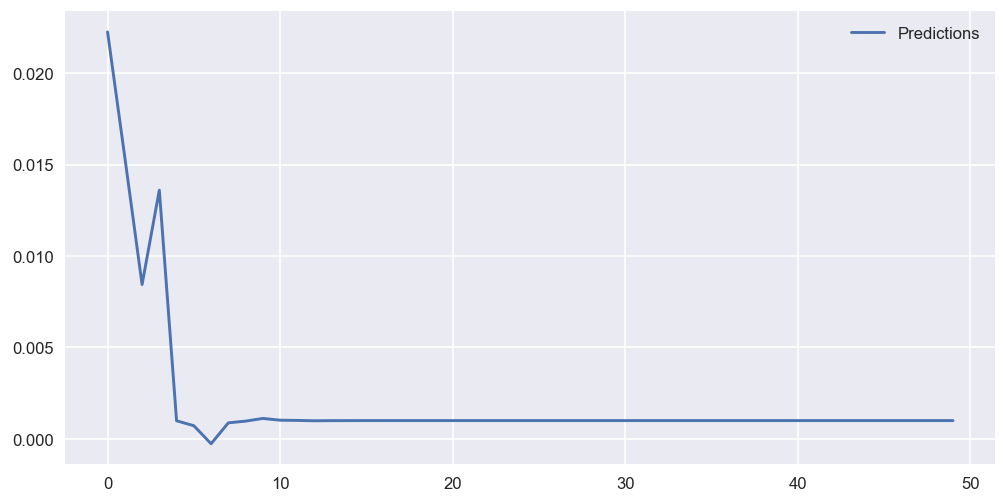

In [28]:
plt.figure(figsize=(10, 5))
plt.plot(forecast.values[:50], label="Predictions");
#plt.plot(acturals.values, label="Acturals");
plt.legend(loc="best");

In [48]:
# Plot the prediction
#plt.plot(train, label="Train")
#plt.plot(test, label="Test")
#plt.plot(forecast, label="Prediction")
#plt.title("AMD Stock Price Prediction")
#plt.xlabel("Time")
#plt.legend(loc="best");

## SVR timestep forecasting to create the X for ARIMAX

In [13]:
from helper_functions import make_windows
import datetime as dt
import math
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [14]:
windows, labels = make_windows(df_to_use.to_numpy(), window_size=5, horizon=1)
windows.shape, labels.shape

((10605, 5), (10605, 1))

In [15]:
X_train, X_test, y_train, y_test = make_train_test_split(windows, labels)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8484, 5), (2121, 5), (8484, 1), (2121, 1))

In [27]:
param_grid = {'C': [0.9, 0.95, 1, 1.05, 1.1],
             "gamma": [0.0009, 0.00095, 0.001, 0.0015, 0.002],
             'kernel': ['rbf', 'linear', 'poly'],
             'epsilon': [0.009, 0.0095, 0.01, 0.015, 0.02]}
grid = GridSearchCV(SVR(), param_grid, refit=True)
grid.fit(X_train, y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.9, 0.95, 1, 1.05, 1.1],
                         'epsilon': [0.009, 0.0095, 0.01, 0.015, 0.02],
                         'gamma': [0.0009, 0.00095, 0.001, 0.0015, 0.002],
                         'kernel': ['rbf', 'linear', 'poly']})

In [28]:
grid.best_params_

{'C': 0.9, 'epsilon': 0.02, 'gamma': 0.0009, 'kernel': 'poly'}

In [22]:
param_grid2 = {'C': [0.65, 0.7, 0.725],
             "gamma": [0.0065, 0.0007, 0.000725],
             'kernel': ['poly'],
             'epsilon': [0.0275, 0.03, 0.0325],
              'degree': [3, 5, 10]}
grid2 = GridSearchCV(SVR(), param_grid2, refit=True)
grid2.fit(X_train, y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.65, 0.7, 0.725], 'degree': [3, 5, 10],
                         'epsilon': [0.0275, 0.03, 0.0325],
                         'gamma': [0.0065, 0.0007, 0.000725],
                         'kernel': ['poly']})

In [23]:
grid2.best_params_

{'C': 0.65, 'degree': 10, 'epsilon': 0.0275, 'gamma': 0.0065, 'kernel': 'poly'}

In [24]:
y_pred = grid2.predict(X_test)
y_pred.shape

(2121,)

In [25]:
y_pred[:5]

array([0.00055639, 0.00055639, 0.00055639, 0.00055639, 0.00055639])

In [26]:
evaluate_preds(y_test, y_pred)

{'mae': 0.024868958,
 'mse': 0.0013713212,
 'rmse': 0.024868963,
 'mape': 15837.165,
 'mase': 0.6825005}

In [42]:
# Save model
from joblib import dump, load
dump(grid, "svr_grid_model.joblib")

['svr_grid_model.joblib']

In [43]:
# Load model and predict
a = load("svr_grid_model.joblib")
loaded_pred = a.predict(X_test)

In [47]:
evaluate_preds(y_test, loaded_pred)

{'mae': 0.02487402,
 'mse': 0.0013735307,
 'rmse': 0.024874026,
 'mape': 291.19968,
 'mase': 0.68263954}

In [20]:
evaluate_preds(test, forecast)

{'mae': 0.024867002,
 'mse': 0.0013703565,
 'rmse': 0.03701831,
 'mape': 20402.992,
 'mase': 0.68269193}

## Try SVR with multi variable data

In [57]:
close_data_full = pd.read_csv("close_data_full.csv", index_col="Date")
close_data_full.shape, close_data_full.head()

((10587, 23),
               smap20        RSI       rsip    BBlowp  DiffHigh$  DiffClose$  \
 Date                                                                          
 1980-04-22 -0.004348  42.335832  55.962133 -0.090374   0.239584    0.270833   
 1980-04-23  0.001838  44.522914  59.466710 -0.080769   0.125000    0.052083   
 1980-04-24  0.004689  50.935908  52.106447 -0.052676   0.083333    0.166667   
 1980-04-25  0.009946  48.305015  53.568173 -0.043467  -0.052083   -0.072917   
 1980-04-28  0.005644  49.113752  52.164132 -0.030311   0.031250    0.020834   
 
             DiffLow$  DiffOpen$   BBuperp     Highp  ...    Closep      SlowK  \
 Date                                                 ...                        
 1980-04-22  0.093750  -0.031250  0.064508  0.101322  ...  0.118182  24.305662   
 1980-04-23  0.218750   0.270833  0.092416  0.048000  ...  0.020325  43.750064   
 1980-04-24  0.020833   0.052083  0.091422  0.030534  ...  0.063745  73.771390   
 1980-04-25  0

In [35]:
HORIZON = 1
WINDOW = 15

In [62]:
from sklearn.preprocessing import StandardScaler
from helper_functions import make_train_test_split, make_windows

X_train_full = close_data_full.drop(labels="Closep", axis=1)
y_train_full = close_data_full["Closep"]

scaler = StandardScaler()
data_scaled = scaler.fit_transform(X_train_full)
label_data = close_data_full["Closep"]

train_size = 0.8

X_train = X_train_full[: int(len(X_train_full) * train_size)]
X_test = X_train_full[int(len(X_train_full) * train_size):]
y_train = y_train_full[: int(len(y_train_full)*train_size)]
y_test = y_train_full[int(len(y_train_full)*train_size):]

print(f"X_train shape: {X_train.shape}\nX_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}\ny_test shape: {y_test.shape}")

X_train shape: (8469, 22)
X_test shape: (2118, 22)
y_train shape: (8469,)
y_test shape: (2118,)


In [ ]:
param_grid = {'C': [0.9],
             "gamma": [0.0009],
             'kernel': ['poly'],
             'epsilon': [0.02],
             'degree': [10]}
grid = GridSearchCV(SVR(), param_grid, refit=True)
grid.fit(X_train, y_train)

In [50]:
grid.best_params_

{'C': 0.9, 'degree': 3, 'epsilon': 0.02, 'gamma': 0.0009, 'kernel': 'rbf'}

In [ ]:
y_pred = grid.predict(X_test)

In [ ]:
evaluate_preds(y_test, y_pred)

## What about VARMA:

https://analyticsindiamag.com/a-guide-to-varma-with-auto-arima-in-time-series-modelling/

https://www.machinelearningplus.com/time-series/vector-autoregression-examples-python/

**Johansen cointegration test:**

https://blog.quantinsti.com/johansen-test-cointegration-building-stationary-portfolio/

ARIMA and VARMA might be able to tell the trend of the time I want to predict. Each numbers are not as accurate but the trend could be good guide to make the decision. I will use this result and compare with true values and predicted values with other models. 